In [1]:
import pandas as pd

la_data = pd.read_csv('ave_hi_la_jan_1895-2018.csv')

la_data.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [8]:
la_data['Date'] = pd.to_datetime(la_data['Date'], format='%Y%m')
la_data['Value'] = pd.to_numeric(la_data['Value'], errors='coerce')

la_data.isnull().sum()


Date       0
Value      0
Anomaly    0
dtype: int64

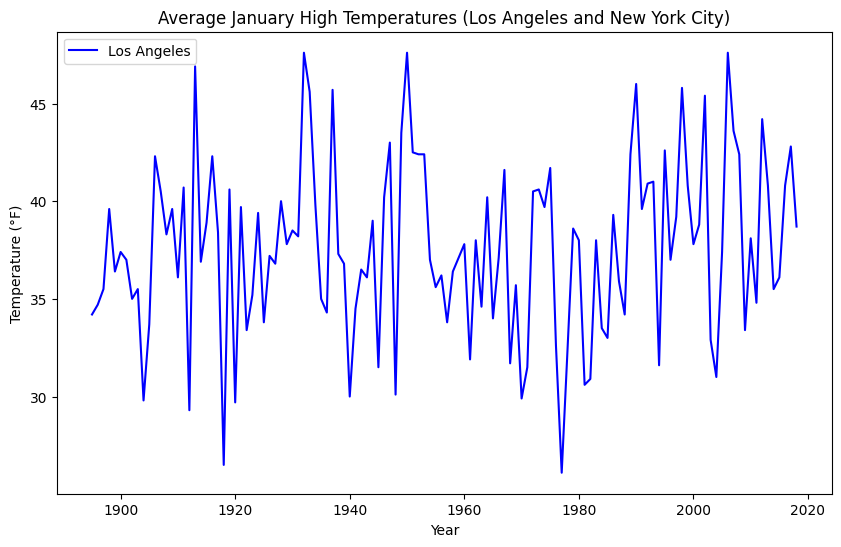

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(la_data['Date'], la_data['Value'], label='Los Angeles', color='blue')

plt.title('Average January High Temperatures (Los Angeles and New York City)')
plt.xlabel('Year')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.show()

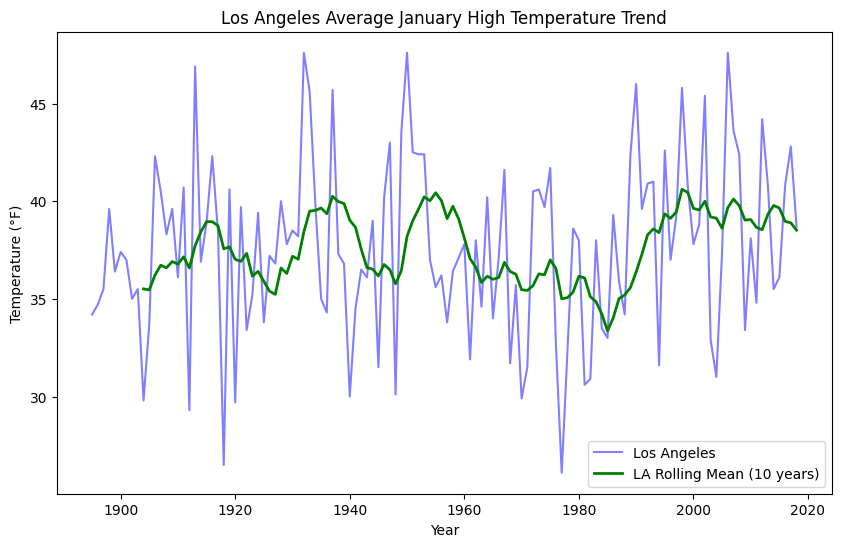

In [11]:
la_data['Rolling_Mean'] = la_data['Value'].rolling(window=10).mean()

plt.figure(figsize=(10, 6))
plt.plot(la_data['Date'], la_data['Value'], label='Los Angeles', color='blue', alpha=0.5)
plt.plot(la_data['Date'], la_data['Rolling_Mean'], label='LA Rolling Mean (10 years)', color='green', linewidth=2)
plt.title('Los Angeles Average January High Temperature Trend')
plt.xlabel('Year')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np

x = np.array(la_data['Date'].dt.year).reshape(-1, 1)
y = la_data['Value'].values

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)

plt.figure(figsize=(10, 6))
plt.plot(la_data['Date'], la_data['Value'], label='Los Angeles', color='blue', alpha=0.5)
plt.plot(la_data['Date'], y_pred, label='LA Linear Trend', color='red', linewidth=2)
plt.title('Los Angeles Average January High Temperature with Trend Line')
plt.xlabel('Year')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.show()

print('LA Temperature Trend Slope:', model.coef_[0])

ModuleNotFoundError: No module named 'sklearn'